# Discussion 10: Conjugate Gradient Methods

In this discussion, we will explore
* conjugate gradient methods

---

### Linear conjugate gradient method (Quadratic functions)

The conjugate gradient was first introduced as an iterative method to solve *linear* equations of the form $Q\mathbf{x}=\mathbf{b}$ where $Q$ is SPD and the dimensionality of the problem is so large that direct methods like Gaussian elimination are time- or even storage-prohibitive. As we have seen before, solving $Q\mathbf{x}=\mathbf{b}$ is equivalent to minimizing the quadratic function $f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TQ\mathbf{x} - \mathbf{b}^T\mathbf{x}$ since $\nabla f(\mathbf{x}) = Q\mathbf{x}-\mathbf{b}$ and thus if $\nabla f(\mathbf{x})=\mathbf{0}$ then $Q\mathbf{x}=\mathbf{b}$.

Similar to a previous calculation for quadratic functions (See Discussion 5), we can easily determine the optimal value of $\alpha_k$ for a given step by taking a derivative of $\phi(\alpha)=f(\mathbf{x}_k +\alpha\mathbf{p}_k)$ and setting it equal to zero, giving

$$ \begin{align*}
    0 &= \mathbf{p}_k^T\big(Q(\mathbf{x}_k+\alpha\mathbf{p}_k)-\mathbf{b}\big) \\
    &= \mathbf{p}_k^T(Q\mathbf{x}_k-\mathbf{b}) + \alpha\mathbf{p}_k^TQ\mathbf{p}_k \\
    &= \mathbf{p}_k^T\nabla f_k + \alpha\mathbf{p}_k^TQ\mathbf{p}_k \\
    \implies &\alpha_k = -\frac{\mathbf{p}_k^T\nabla f_k}{\mathbf{p}_k^TQ\mathbf{p}_k}
\end{align*}$$

With this step size, we now show that if someone sets in our lap a magical set $\{\mathbf{p}_0, \mathbf{p}_1, \ldots, \mathbf{p}_{n-1}\}$ which happen to be a $Q$-conjugate (and thus linearly independent) family, we have convergence in at most $n$ steps, where $\mathbf{x}\in\mathbb{R}^n$. First, note that if the set of direction vectors are linearly independent, they form a basis of $\mathbb{R}^n$, and thus we can write any vector as a unique linear combination of them. In particular, we can write

$$ \mathbf{x}^*-\mathbf{x}_0 = \sigma_0\mathbf{p}_0 + \sigma_1\mathbf{p}_1  + \cdots + \sigma_{n-1}\mathbf{p}_{n-1}$$

Multiplying the above on the left by $\mathbf{p}_k^TQ$ and using conjugacy, we have

$$ \mathbf{p}_k^TQ(\mathbf{x}^*-\mathbf{x}_0) = \sigma_0\mathbf{p}_k^TQ\mathbf{p}_0 + \sigma_1\mathbf{p}_kQ\mathbf{p}_1  + \cdots + \sigma_{n-1}\mathbf{p}_kQ\mathbf{p}_{n-1} = \sigma_k\mathbf{p}_k^TQ\mathbf{p}_k \implies \sigma_k = \frac{\mathbf{p}_k^TQ(\mathbf{x}^*-\mathbf{x}_0)}{\mathbf{p}_k^TQ\mathbf{p}_k}$$

We now note that
$$ \mathbf{x}_k = \mathbf{x}_0 + \alpha_0\mathbf{p}_0 + \alpha_1\mathbf{p}_1 + \cdots + \alpha_{k-1}\mathbf{p}_{k-1}$$
which by the same premultiplying trick leads to
$$ \mathbf{p}_k^TQ(\mathbf{x}_k-\mathbf{x}_0) = 0$$
Then the numerator of $\sigma_k$ above is equal to

$$ \mathbf{p}_k^TQ(\mathbf{x}^* - \mathbf{x}_0) = \mathbf{p}_k^TQ(\mathbf{x}^*-\mathbf{x}_k+\mathbf{x}_k-\mathbf{x}_0) = \mathbf{p}_k^TQ(\mathbf{x}^*-\mathbf{x}_k) = \mathbf{p}_k^T(\mathbf{b}-Q\mathbf{x}_k) = -\mathbf{p}_k^T\nabla f_k $$

i.e. $\sigma_k=\alpha_k$. Thus $\mathbf{x}^* = \mathbf{x}_0 + \alpha_0\mathbf{p}_0 + \cdots + \alpha_{n-1}\mathbf{p}_{n-1}$ and we have shown convergence in at most $n$ steps.

Now the question becomes, how does one generate such a set of $Q$-conjugate step directions? This is where the conjugate gradient update comes into play: If $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$ then multiplying on the left by $\mathbf{p}_k^TQ$ gives

$$\mathbf{p}_k^TQ \mathbf{p}_{k+1} = \mathbf{p}_k^TQ(-\nabla f_{k+1} + \beta_k\mathbf{p}_k) $$

which, if we want to vanish, requires

$$ \beta_k = \frac{\mathbf{p}_k^TQ\nabla f_{k+1}}{\mathbf{p}_k^TQ\mathbf{p}_k} $$

We skip the details here but it is shown in lecture that even though we only assert $\mathbf{p}_k$ and $\mathbf{p}_{k+1}$ are $Q$-conjugate, this choice of $\beta_k$ happens to give us $Q$-conjugacy with *all* previous step directions, as desired! In fact an even stronger intermediate result is that $\nabla f_k^T\mathbf{p}_j=0$ for all $j<k$.

Thus, a self-contained way of implementing the linear conjugate gradient method is as follows:

1. Set $\mathbf{p}_0 = -\nabla f_0$, as in steepest descent.
2. Set $\alpha_k = -\dfrac{\mathbf{p}_k^T\nabla f_k}{\mathbf{p}_k^TQ\mathbf{p}_k}$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$.
3. Set $\beta_k =\dfrac{\mathbf{p}_k^TQ\nabla f_{k+1}}{\mathbf{p}_k^TQ\mathbf{p}_k}$ and update $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$.
4. Repeat 2-3 until convergence.

#### Efficiency improvements

While the above seems bulletproof in terms of analysis, it does require quite a few matrix multiplications and two different evaluations of the gradient during each iteration, which can be costly if the dimensionality of the problem is large. We can actually make some clever adjustments to this calculation based on niceties of quadratic functions to improve the computational efficiency of the algorithm.

Note first that
$$ \nabla f_k = Q\mathbf{x}_k-\mathbf{b}\implies \mathbf{p}_k = -\nabla f_k + \beta_{k-1}\mathbf{p}_{k-1}$$

and thus the numerator of $\alpha_k$ simplifies to

$$ \mathbf{p}_k^T\nabla f_k = (-\nabla f_k + \beta_{k-1}\mathbf{p}_{k-1})^T\nabla f_k = -\nabla f_k^T\nabla f_k +\beta_{k-1}\mathbf{p}_{k-1}^T\nabla f_k = -\nabla f_k^T\nabla f_k $$

where the second term vanishes due to the orthognality of $\nabla f_k$ and $\mathbf{p}_j$ for all $j<k$.

Furthermore, we see that
$$ \nabla f_{k+1} - \nabla f_k = Q(\mathbf{x}_{k+1}-\mathbf{x}_k) = \alpha_kQ\mathbf{p}_k \implies \nabla f_{k+1} = \nabla f_k + \alpha_kQ\mathbf{p}_k$$

gives us a recursive update of the gradient, and a similar argument as above leads to the simplification 

$$ \beta_k = \frac{\nabla f_{k+1}^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k}$$

With each of the above, then, we state a final, **efficient version of the linear conjugate gradient method**:

1. Set $\mathbf{r}_0= Q\mathbf{x}_0-\mathbf{b}$ (often called the [residual](https://en.wikipedia.org/wiki/Residual_(numerical_analysis))), $\mathbf{p}_0 = -\mathbf{r}_0$.
2. Calculate and store $\mathbf{y}_k=Q\mathbf{p}_k$.
3. Set $\alpha_k = \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{p}_k^T\mathbf{y}_k}$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$.
4. Update $\mathbf{r}_{k+1} = \mathbf{r}_k + \alpha_k\mathbf{y}_k$.
5. Set $\beta_k =\dfrac{\mathbf{r}_{k+1}^T\mathbf{r}_{k+1}}{\mathbf{r}_k^T\mathbf{r}_k}$ and update $\mathbf{p}_{k+1} = -\mathbf{r}_{k+1} + \beta_k\mathbf{p}_k$.
6. Repeat 2-5 until convergence.

Note that in the above, there is only a *single* matrix multiplication each iteration, and the gradient is never explicitly evaluated. Furthermore, no matrices other than $Q$ ever need to be stored in memory, and each of $\mathbf{x}_k$, $\mathbf{p}_k$, and $\mathbf{y}_k$ can be overwritten during each iteration. We only need to keep $\mathbf{r}_k$ for two iterations (in the calculation of $\beta_k$), so a smart implementation of conjugate gradient is also very memory efficient.

---

## Implementation

Below, we implement CG (inefficient version)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def plot_path(path, func, title, window=[-10,10,-10,10], numContours=50, skip=1):
    '''Plots path defined in (N,2) array "path" on a contour plot of "func" in window "window"'''
    plt.figure(figsize=(10,10))
    X = np.linspace(window[0],window[1],300)
    Y = np.linspace(window[2],window[3],300)
    Xmesh, Ymesh = np.meshgrid(X,Y)
    Z = [f(np.array([x,y])) for x,y in zip(Xmesh.ravel(), Ymesh.ravel())]
    Z = np.array(Z).reshape(Xmesh.shape)
    CS = plt.contour(Xmesh, Ymesh, Z, numContours, cmap='jet')
    plt.clabel(CS,inline_spacing=0,fmt='%d')
    plt.axis(window)
    plt.plot(path[0][0], path[0][1], marker='x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    for i in range(path.shape[0]-1): # iterate through steps
        if i%skip==0:
            # only plot arrows every "skip" iterations
            plt.arrow(path[i,0],path[i,1],path[i+1,0]-path[i,0],path[i+1,1]-path[i,1],
                      color='k',length_includes_head=True)
    plt.show()

In [ ]:
# @ is matrix multiplication: this'll be the same thing as saying
# np.dot(x, np.dot(Q, x))

In [17]:
def CG_alg(x0, Q, b, tol=1e-7, max_steps=10000, rho=0.75):
    f = lambda x: 1/2 * x @ Q @ x - b @ x # 1/2 x^T Q x - b^T x
    Df = lambda x: Q @ x - b
    x=x0
    path_CG = [x]
    tol = 1e-7            # stop when gradient is smaller than this amount
    max_steps = 10000     # Maximum number of steps to run the iteration
    rho = 0.75            # rho for backtracking
    i=0                   # iteration count
    gk = Df(x)          # current gradient
    dk = -gk
    dks = [dk]
    gks = [gk]

    while np.linalg.norm(gk)>tol and i<max_steps:    
        alpha = - dk @ gk / (dk @ Q @ dk)
        xnew = x + alpha*dk
        gk1 = Df(xnew)
        beta = (dk @ Q @ gk1)/ (dk @ Q @ dk)
        dk = -gk1+ beta*dk
        dks.append(dk)
        path_CG.append(xnew)
        x = xnew
        gk = gk1
        gks.append(gk)
        
        i += 1

    path_CG=np.array(path_CG)
    dks = np.array(dks)
    gks = np.array(gks)
    print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')
    return path_CG, dks, gks

In [19]:
Q = np.array([[9,0],[0,4]])
b = np.array([2,4])
x0 = (1.5,2)
path_CG, dks, gks = CG_alg(x0, Q, b)
print(path_CG)

After 2 iterations, approximate minimum is -2.2222222222222228 at [0.22222222 1.        ]
[[1.5        2.        ]
 [0.14072155 1.52720749]
 [0.22222222 1.        ]]


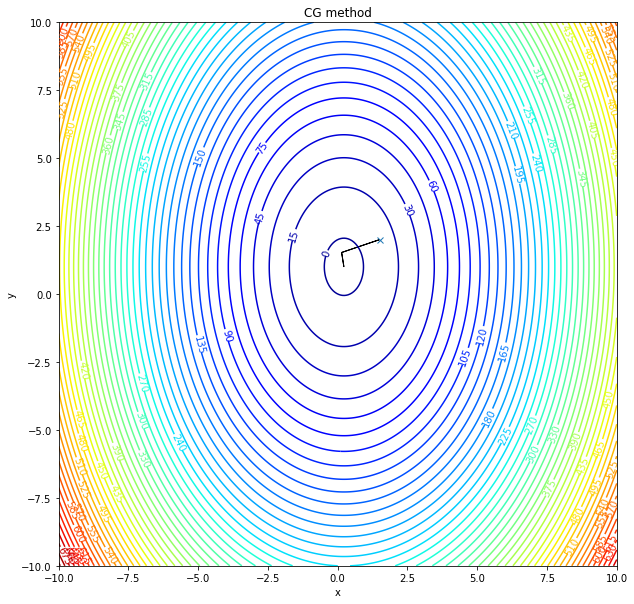

In [20]:
f = lambda x: 1/2 * x @ Q @ x - b @ x
plot_path(path_CG,f,'CG method')

### Verifying Some properties:

Conjugacy: $d_i^T Q d_j = 0$

In [21]:
for i in range(len(dks)):
    for j in range(i+1, len(dks)):
        print(dks[i]@Q@dks[j])

1.4210854715202004e-14
-6.894484982922222e-14
0.0


$g_{k+1} = \nabla f_{k+1}$
Orthogonality: $g_{k+1}^T d_j = 0$

In [22]:
for i in range(1,len(gks)):
    for j in range(0,i):
        print("i={0}, j={1} dot product {2:.2f}".format(i,j,gks[i]@dks[j]))

i=1, j=0 dot product 0.00
i=2, j=0 dot product 0.00
i=2, j=1 dot product -0.00
